INTRODUCCION
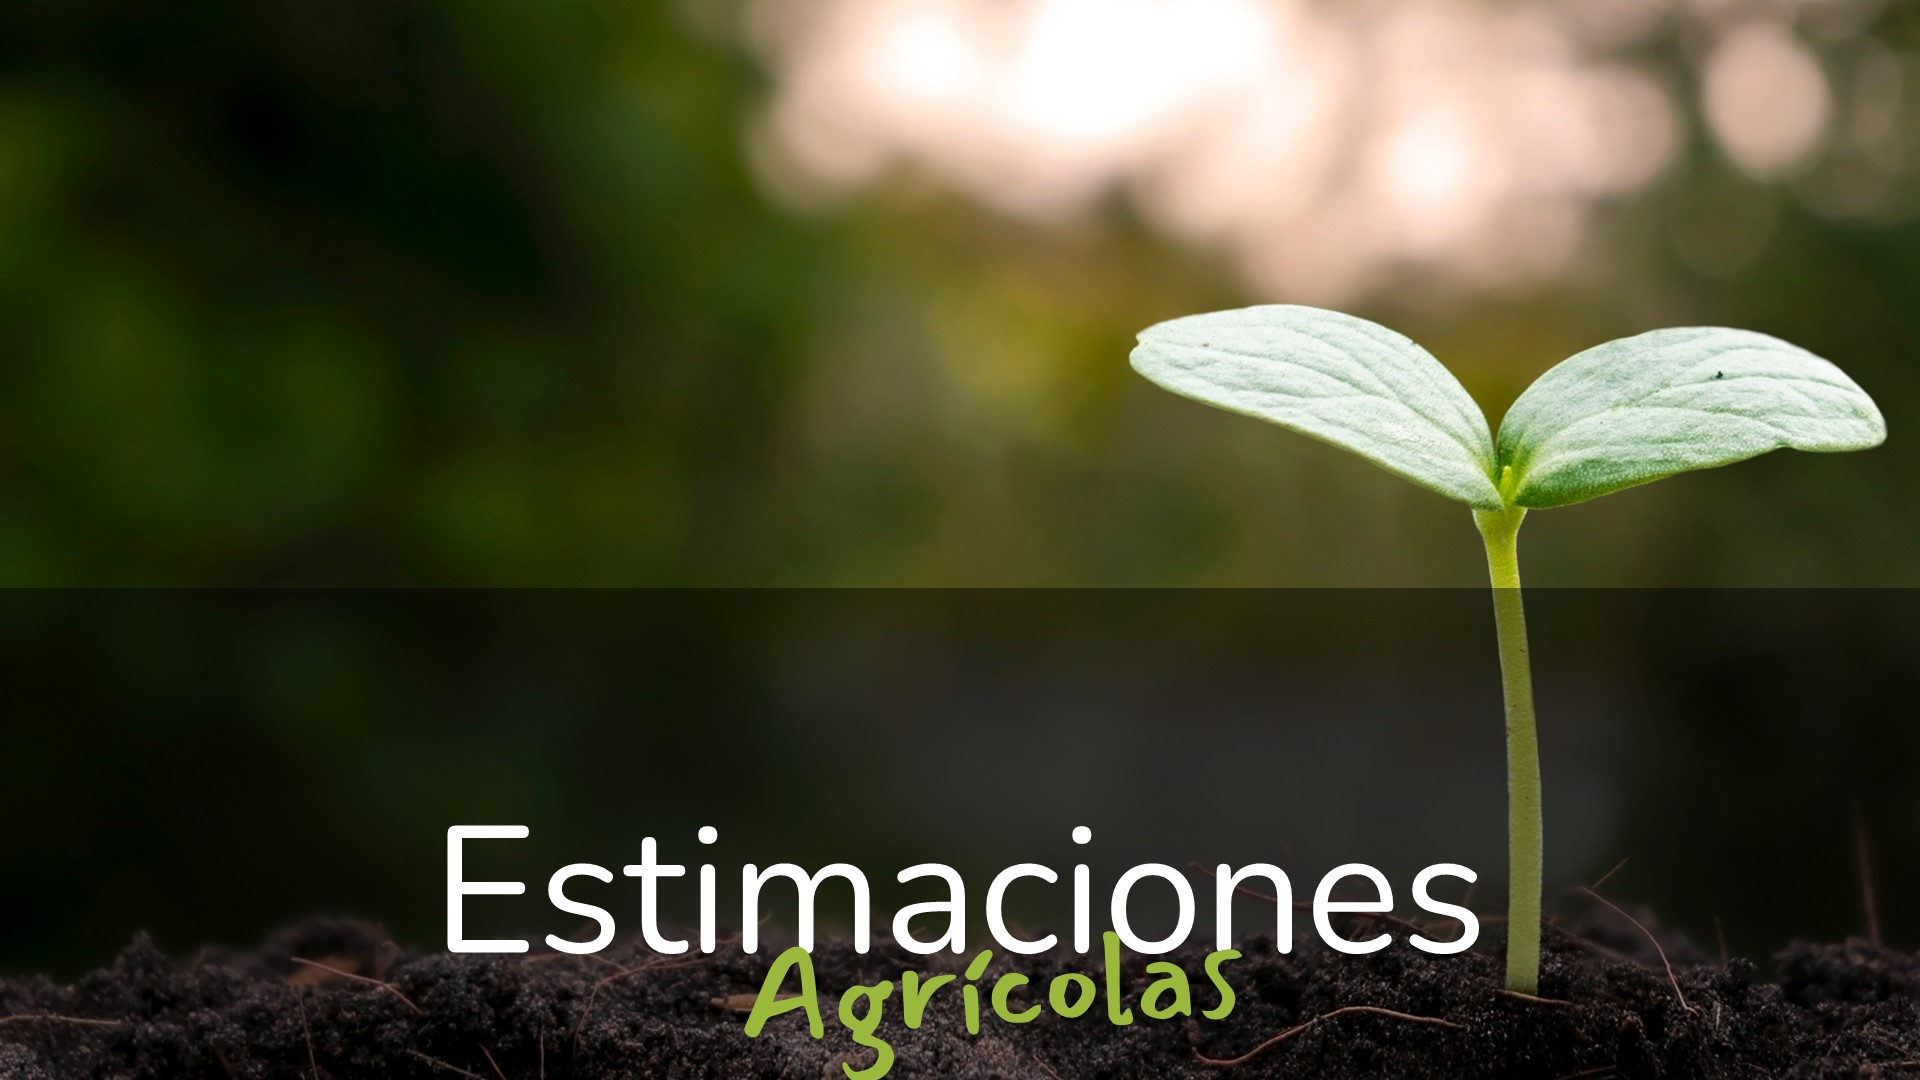

Estimaciones Agrícolas es un documento de estadìsticas agricolas de cultivo/ cosecha/ localidades que continene información relacionada con la distribución zonal de semillas en el campo argentino. Este análisis nos permitirá identificar potenciales territorios para siembra/inversion.

Objetivo:
1) Conocer las plantaciones más efectivas. Nos enfocaremos en el top 10 de todas las semillas, para potenciar las mismas.
2) Identificar futuras inversiones. En base a ese top 10, buscar herramientas agrarias que persuadan a los inversores extranjeros elegir el Territorio Argentino como primer opciòn de desembolso de dinero.
3) Detectar localidades en territorio argentino para la siembra. Argentina posee demogràficamente localidades para potenciar la siembra y crecer a nivel mundial en cuestiones agrarias.

A quien está destinado: 1) Colaboradores administrativos 2) Jefes, Gerencia General, quien toma decisiones

Hipótesis:
 1) La Superficie Sembrada en este análisis no garantiza efectividad en la producción. Lo que se debe analizar también es el manejo de la tierra como un factor mucho mas relevante, ya que cada cierta cantidad de años se debe renovar. Cómo verificarlo: Comparar las superficies sembradas y cosechadas con la producción total mediante un gráfico de dispersión. Podría aplicarse un análisis de eficiencia para evaluar qué productores logran mejores rendimientos por hectárea.
 2) El hecho de que una superficie brinde mejor producciòn no garantiza estabilidad econòmica, pues hay que considerar el factor climàtico, ya que puede destruir todo lo producido en un solo dìa y generar pèrdidas irreparables.

BIBLIOTECA Drive- MyDrive https://datos.gob.ar/dataset

VARIABLES Media/Mediana/Moda Dispersión_ Varianza, desviación estandar Cuantiles y percentiles.

MEDIDAS DESCRIPTIVAS

DISTRIBUCION DE DATOS

Contexto Comercial

Este modelo puede ser utilizado para empresas de la agroindustria, tanto para la plantaciòn de semillas a utilizar para futuras inversiones, como tambièn identificar terrenos para potenciar la cosecha en territorio argentino. Lo cual terminarà en un gran contexto pues se ampliarà la mano de obra generando ofertas locales, y asì atraer mas inversiones al paìs de origen.

Contexto Analìtico

Se utilizarà un modelo de regresiòn para predecir futuras inversiones para el tipo de semillas a cultivar.


# **DEFINICION DE VARIABLES UTILIZADAS EN NUESTRO DATA SET**

1.   Cultivo: Nombre de la semilla utilizada
2.   Municipio: Ciudad o zona delimitada donde se planta la semilla
3.   Superficie: Area plantada
4.   Producciòn: Datos que arroja resultados positivos o negativos de la cosecha
5.   Rendimiento: Datos que arroja en porcentaje los valores que resultan de la producciòn
6.   Origen Empresa: Se dividiò en 6, Estado Argentino / Sean King (Productor) / Charles Vitta (Productor) /  Marilia Mendoca (Productor) / Wo Jinn (Productor) / Sean King (Productor)
7.    Productor: Es una persona fìsica profesional matriculada para operar tareas agrarias. Se los conoce como Ingenieros Agrònomos, que pueden trabajar de manera independiente o bien para el estado.
8.   Inversiòn: Dinero expresado en Pesos Argentinos / Dolares



#Lectura de Datos

In [ ]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as mticker

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd = pd.read_csv('/content/drive/MyDrive/DS II/Estimaciones Agricolas TPDATASCI csv.csv')

Previsualizamos cantidad de columnas y filas. Lectura del DATASET



In [ ]:
pd.head()

,cultivo_nombre,municipio_nombre,superficie_sembrada,superficie_cosechada,Origen_Empresa,Productor_nombre,Inversion_moneda,Inversion_divisa USD,produccion en toneladas,rendimiento USD,roi_porcent,latitud,longitud,year_fecha
0,Ajo,25 de Mayo,3,3,Local,Estado Argentino,ARS,79.91,10,3333.00,10%,-35.4432,-60.1721,January-20
1,Ajo,Adolfo Gonzales Chaves,15,15,Extranjera,Wo Jinn,USD,5000.00,82,5467.00,1%,-38.0481,-60.0744,January-20
2,Ajo,Alberti,5,5,Extranjera,Wo Jinn,USD,5000.00,7,1400.00,7%,-35.0279,-60.2851,January-20
3,Ajo,Almirante Brown,2,2,Local,Estado Argentino,ARS,79.91,8,4000.00,9%,-34.8116,-58.2619,January-20
4,Ajo,Arrecifes,6,6,Local,Estado Argentino,ARS,79.91,15,2500.00,10%,-34.0587,-60.1195,January-20


Observamos que nuestro dataset contiene 14 columnas y 49830 filas

In [ ]:
pd.shape

(49830, 14)

#DATA WRANGLING: Limpieza y transformaciòn de datos

Limpiamos nuestra base de Datos antes de avanzar para detectar nulos en las columnas y si hay int o float tambien.

In [ ]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49830 entries, 0 to 49829
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cultivo_nombre           49830 non-null  object 
 1   municipio_nombre         49830 non-null  object 
 2   superficie_sembrada      49830 non-null  int64  
 3   superficie_cosechada     49830 non-null  int64  
 4   Origen_Empresa           49830 non-null  object 
 5   Productor_nombre         49830 non-null  object 
 6   Inversion_moneda         49830 non-null  object 
 7   Inversion_divisa USD     49830 non-null  float64
 8   produccion en toneladas  49830 non-null  int64  
 9    rendimiento USD         49830 non-null  object 
 10  roi_porcent              49830 non-null  object 
 11  latitud                  49830 non-null  float64
 12  longitud                 49830 non-null  float64
 13  year_fecha               49830 non-null  object 
dtypes: float64(3), int64(3

Verificamos que no hay datos nulos, pero vamos a realizar un chequeo nuevamente

In [ ]:
pd.isnull().sum()

,0
cultivo_nombre,0
municipio_nombre,0
superficie_sembrada,0
superficie_cosechada,0
Origen_Empresa,0
Productor_nombre,0
Inversion_moneda,0
Inversion_divisa USD,0
produccion en toneladas,0
rendimiento USD,0


Efectivamente nuestro dataset no cuenta con valores nulos

In [ ]:
zero = pd == 0
zero.sum()

,0
cultivo_nombre,0
municipio_nombre,0
superficie_sembrada,396
superficie_cosechada,3908
Origen_Empresa,0
Productor_nombre,0
Inversion_moneda,0
Inversion_divisa USD,0
produccion en toneladas,3520
rendimiento USD,0


Observamos cuantos 0 existen en nuestra planilla, para ir limpiandolos

In [ ]:
num_zeros = (pd[['superficie_cosechada','produccion en toneladas']] == 0).sum()
print(num_zeros)

superficie_cosechada       3908
produccion en toneladas    3520
dtype: int64


Se detecta que Superficie Cosechada tiene 3908 registros con datos en cero, es decir que hay zonas que no se han cosechado en absoluto---

Producción en toneladas registra 3520 registros en cero, es decir que no brindó rentabilidad.

Por lo tanto reemplazaremos los datos en 0 para trabajarlos mejor. Es probable que por cuestiones climàticas, o imprevistos, no haya brindado producciòn positiva esperada.

In [ ]:
#reemplazamos los 0 por ^nan^
pd[['superficie_cosechada','produccion en toneladas']] = pd[['superficie_cosechada','produccion en toneladas']].replace(0, np.nan)

In [ ]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49830 entries, 0 to 49829
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cultivo_nombre           49830 non-null  object 
 1   municipio_nombre         49830 non-null  object 
 2   superficie_sembrada      49830 non-null  int64  
 3   superficie_cosechada     45922 non-null  float64
 4   Origen_Empresa           49830 non-null  object 
 5   Productor_nombre         49830 non-null  object 
 6   Inversion_moneda         49830 non-null  object 
 7   Inversion_divisa USD     49830 non-null  float64
 8   produccion en toneladas  46310 non-null  float64
 9    rendimiento USD         49830 non-null  object 
 10  roi_porcent              49830 non-null  object 
 11  latitud                  49830 non-null  float64
 12  longitud                 49830 non-null  float64
 13  year_fecha               49830 non-null  object 
dtypes: float64(5), int64(1

In [ ]:
pip install missingno

In [ ]:
import missingno as msno

#Graficos de Valores Faltantes

Utilizaremos la libreria Missingno para explorar de manera mas visual los datos faltantes
Visualización según grafico de matriz y grafico de barras.

<Axes: >

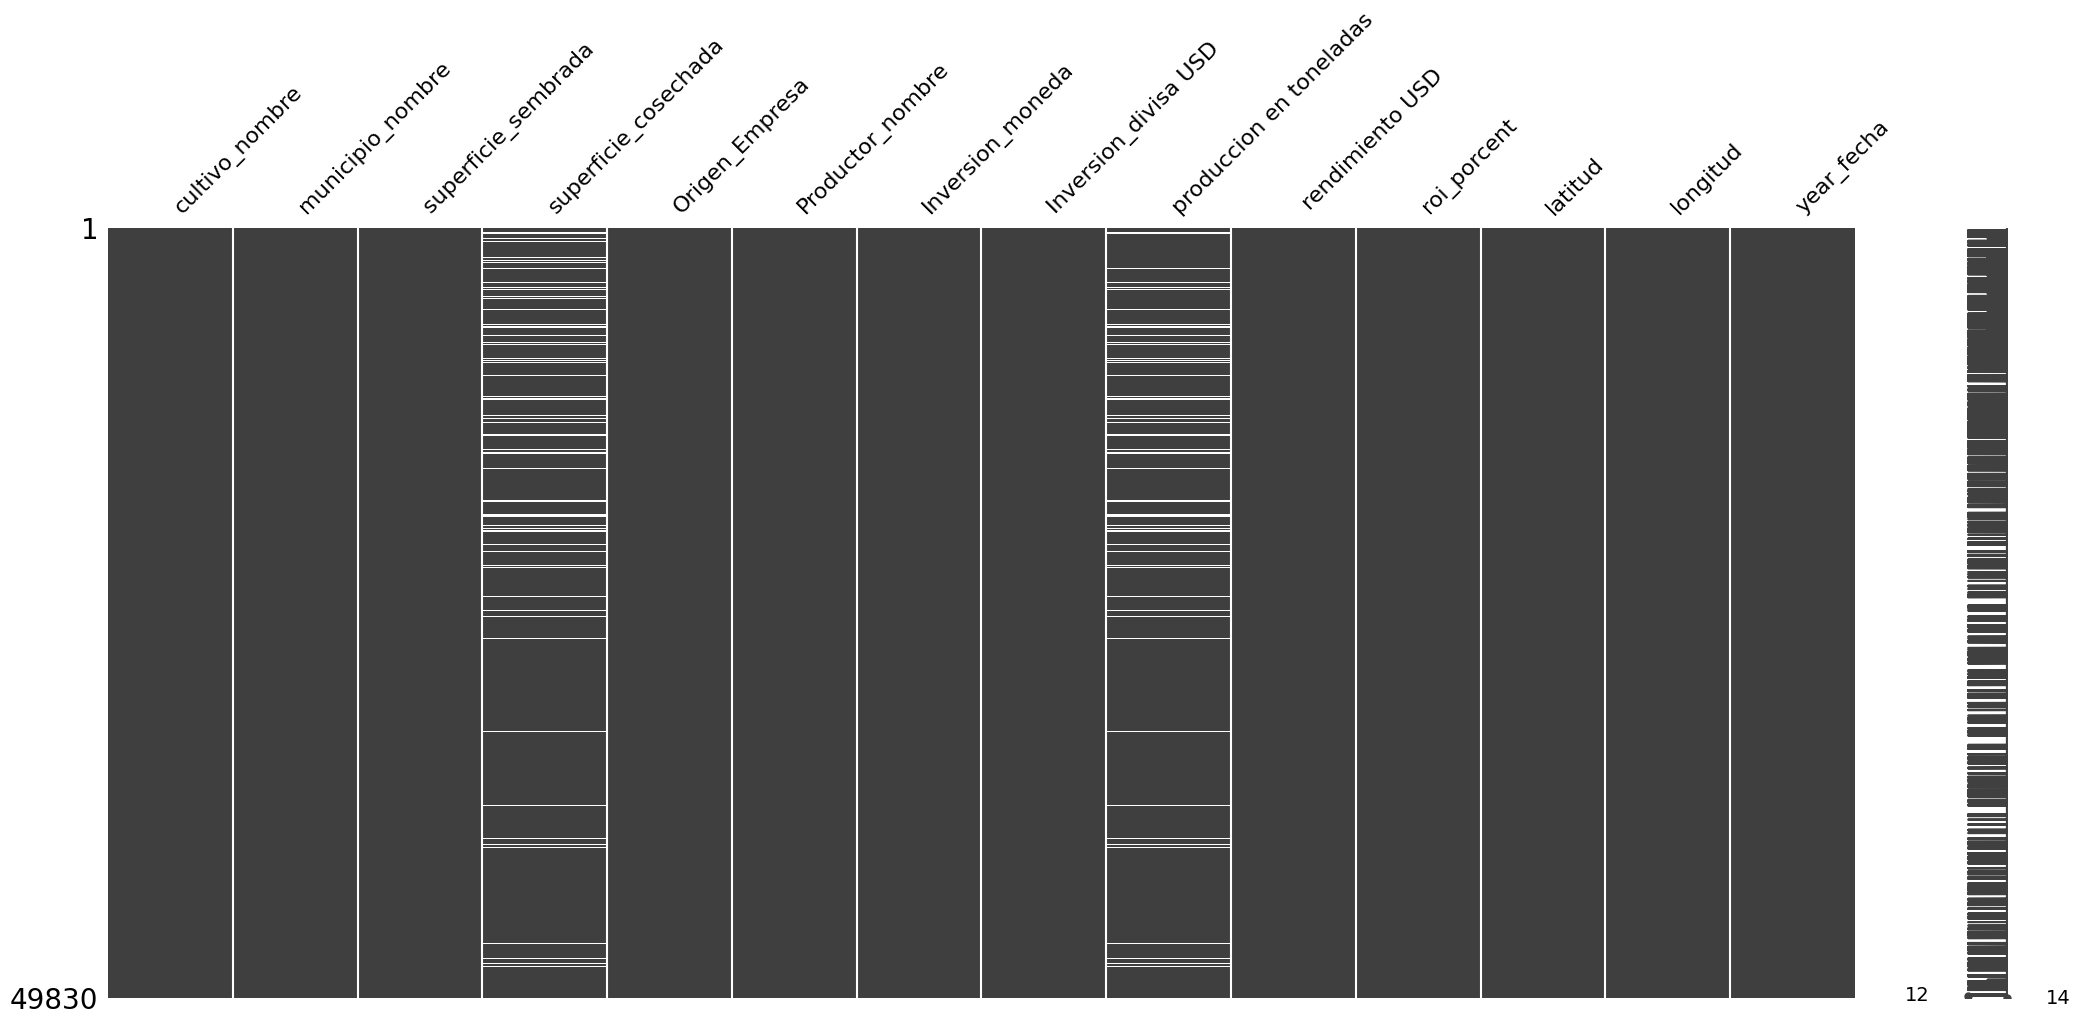

In [ ]:
#Grafico de matriz
msno.matrix(pd)

Podemos observar en la libreria missingo que hay pocas columnas con datos faltantes.
Efectivamente detectamos que "superficie cosechada" y "produccion en toneladas" contienen datos vacios o en cero. Por lo que por default la columna siguietne donde muestra el "porcentaje de perdida" también arrojará datos en cero.

<Axes: >

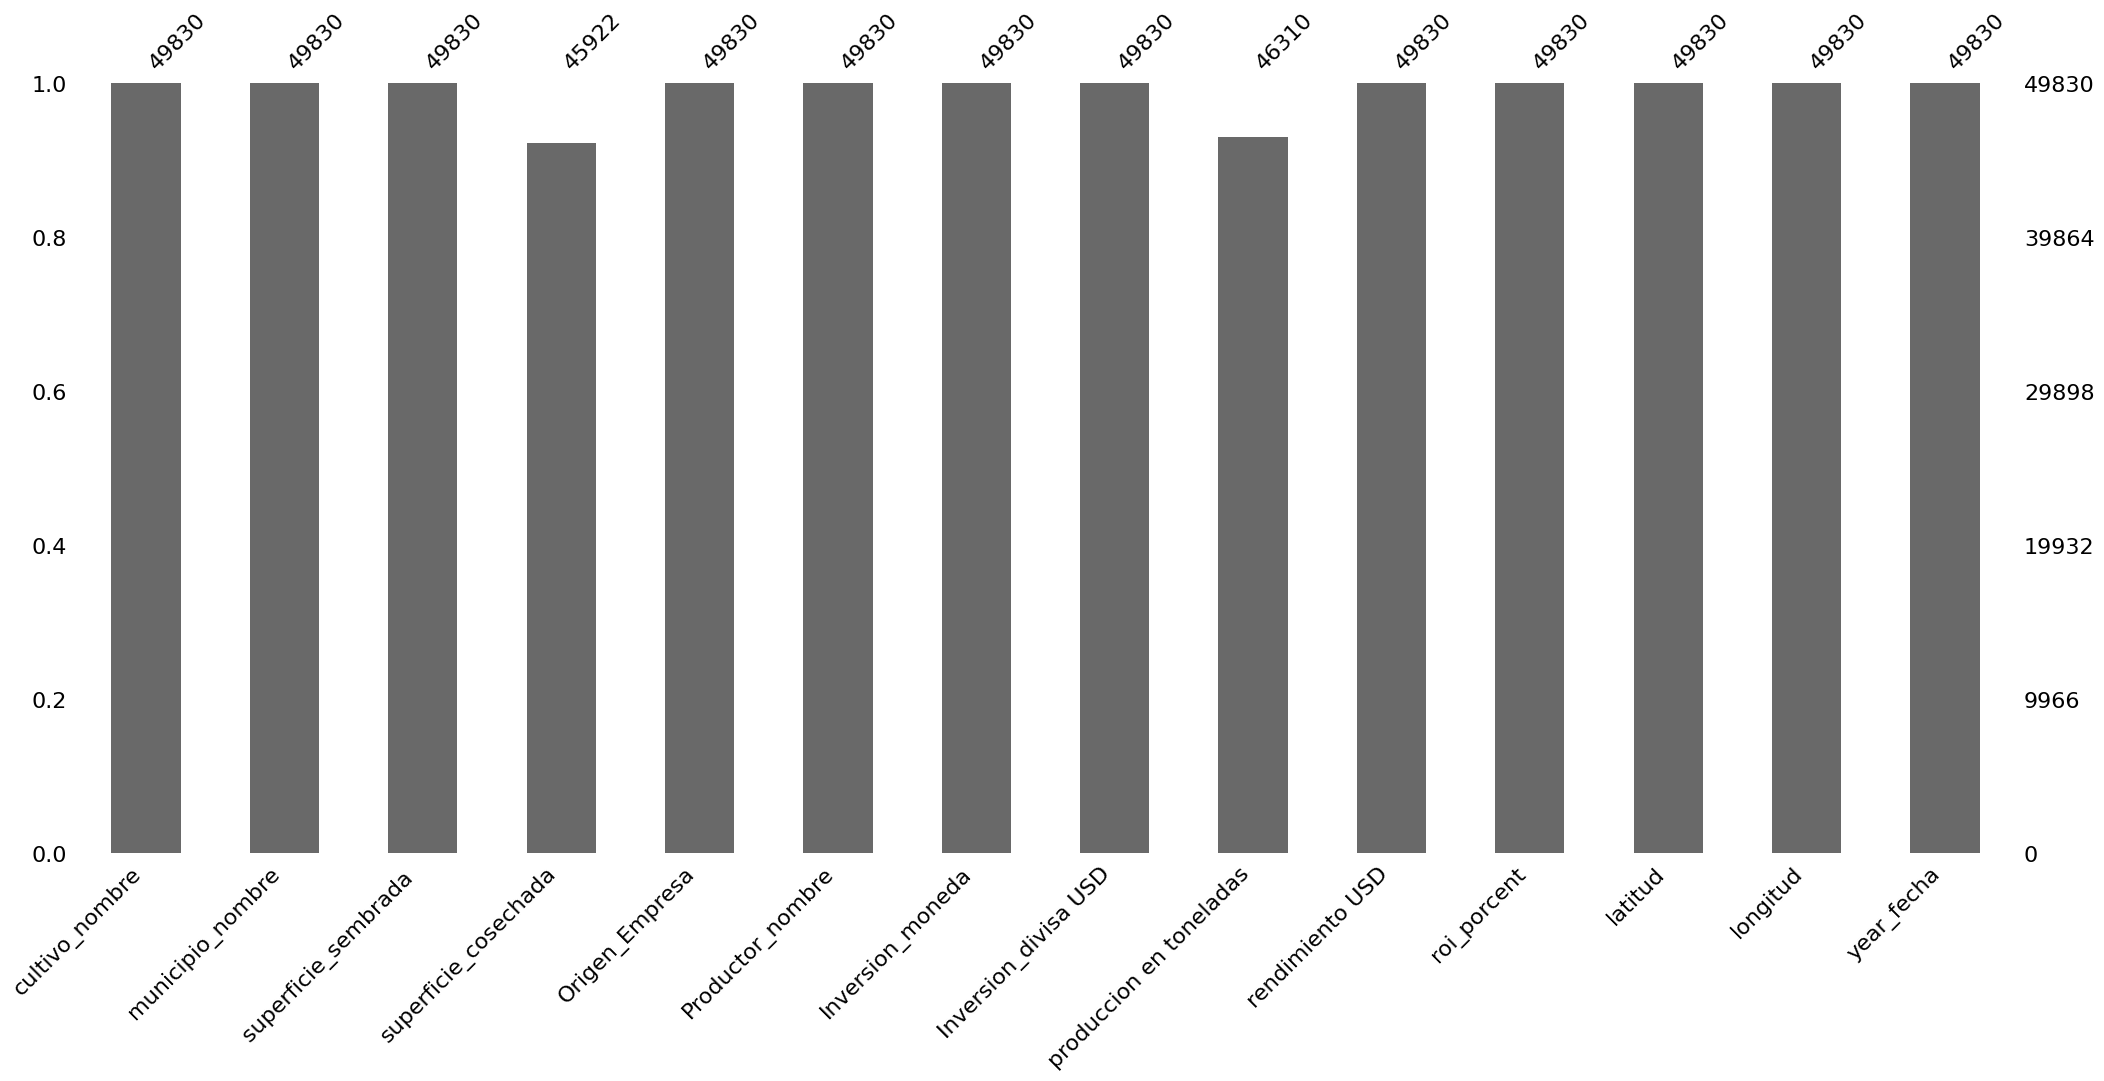

In [ ]:
#Grafico de barras
msno.bar(pd)

<Axes: >

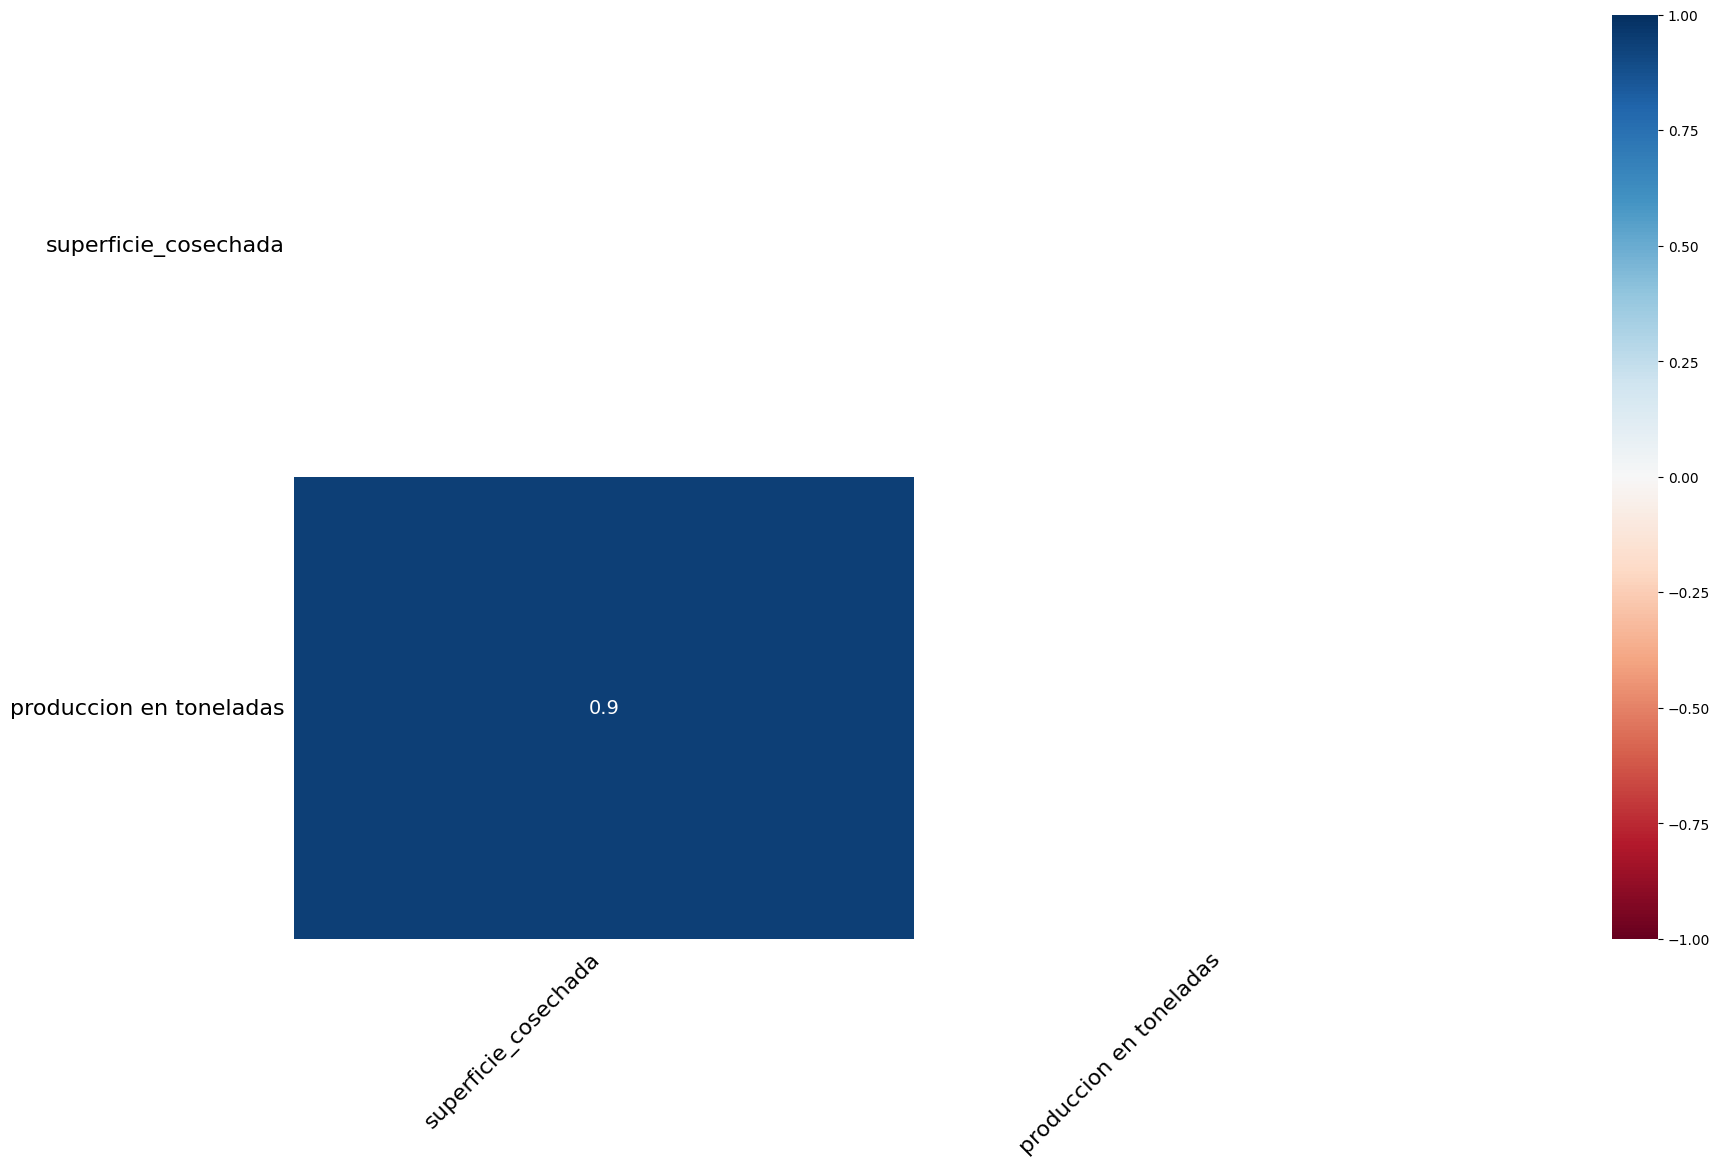

In [ ]:
#Grafico de mapa de calor de la correlacion
msno.heatmap(pd)

#Agrupacion y Agregacion de Datos

Vamos a agrupar nuestro análisis para poder trabajar con números mas reducidos y poder ya ir enfocàndonos en nuestro objetivo.
Recordamos Objetivo:


*   Conocer plantaciones mas efectivas **(Cultivo)**
*   Identificar futuras inversiones **(Finanzas)**
*   Detectar localidades en Territorio Argentino para la siembra **(Producciòn)**






In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DS II/Estimaciones Agricolas TPDATASCI csv.csv')
frames = [df['superficie_cosechada'], df['produccion en toneladas']]

In [ ]:
result = pd.concat(frames)
print(result)

0             3
1            15
2             5
3             2
4             6
          ...  
49825    235882
49826    484392
49827     37700
49828     12803
49829     36250
Length: 99660, dtype: int64


En este caso agruparemos el dataframe en 3 grupos.
CULTIVO
FINANZAS
PRODUCCION

In [ ]:
import pandas as pd

In [ ]:
data = {
    'cultivo_nombre':['Ajo', 'Ajo', 'Ajo', 'Ajo'],
    'municipio_nombre': ['25 de Mayo', 'Adolfo Gonzales Chaves', 'Alberti', 'Almirante Brown'],
    'superficie_sembrada': [3, 15, 5, 2],
    'superficie_cosechada': [3, 15, 5, 2],
    'Origen_Empresa': ['Local', 'Extranjera', 'Extranjera', 'Local'],
    'Productor_nombre': ['Estado Argentino', 'Wo Jinn', 'Wo Jinn', 'Estado Argentino'],
    'Inversion_moneda': ['ARS', 'USD', 'USD', 'ARS'],
    'Inversion_divisa USD': [79.91, 5000.00, 5000.00, 79.91],
    'produccion en toneladas': [10, 82, 7, 8],
    'rendimiento USD': [3333.00, 5467.00, 1400.00, 4000.00],
    'roi_porcent': ['10%', '1%', '7%', '9%'],
    'latitud': [-35.4432, -38.0481, -35.0279, -34.8116],
    'longitud': [-60.1721, -60.0744, -60.2851, -58.2619],
    'year_fecha': ['January-20', 'January-21', 'January-22', 'January-23']
}


In [ ]:
df = pd.DataFrame(data)


In [ ]:
pd_cultivo = df[['cultivo_nombre', 'municipio_nombre','latitud', 'longitud']]
pd_finanzas = df[['Origen_Empresa', 'Productor_nombre', 'Inversion_moneda', 'Inversion_divisa USD', 'roi_porcent']]
pd_produccion = df[['superficie_sembrada', 'superficie_cosechada', 'produccion en toneladas', 'rendimiento USD', 'year_fecha']]

print("Datos de Cultivo:")
print(pd_cultivo)

print("\nDatos Financieros:")
print(pd_finanzas)

print("\nDatos de Producción:")
print(pd_produccion)

Datos de Cultivo:
  cultivo_nombre        municipio_nombre  latitud  longitud
0            Ajo              25 de Mayo -35.4432  -60.1721
1            Ajo  Adolfo Gonzales Chaves -38.0481  -60.0744
2            Ajo                 Alberti -35.0279  -60.2851
3            Ajo         Almirante Brown -34.8116  -58.2619

Datos Financieros:
  Origen_Empresa  Productor_nombre Inversion_moneda  Inversion_divisa USD  \
0          Local  Estado Argentino              ARS                 79.91   
1     Extranjera           Wo Jinn              USD               5000.00   
2     Extranjera           Wo Jinn              USD               5000.00   
3          Local  Estado Argentino              ARS                 79.91   

  roi_porcent  
0         10%  
1          1%  
2          7%  
3          9%  

Datos de Producción:
   superficie_sembrada  superficie_cosechada  produccion en toneladas  \
0                    3                     3                       10   
1                   15      

Pudieramos realizar la misma codificacion si precisaramos ver otro tipo de
cultivo, como por ejemplo Soja,, Cebada y Trigo %%

In [ ]:
import pandas as pd

In [ ]:
data = {
    'cultivo_nombre':['Ajo', 'Soja', 'Cebada', 'Trigo'],
    'municipio_nombre': ['25 de Mayo', 'Adolfo Gonzales Chaves', 'Alberti', 'Almirante Brown'],
    'superficie_sembrada': [3, 15, 5, 2],
    'superficie_cosechada': [3, 15, 5, 2],
    'Origen_Empresa': ['Local', 'Extranjera', 'Extranjera', 'Local'],
    'Productor_nombre': ['Estado Argentino', 'Sean King', 'Marilia Mendoza', 'Wo Jinn'],
    'Inversion_moneda': ['ARS', 'USD', 'USD', 'ARS'],
    'Inversion_divisa USD': [79.91, 5000.00, 5000.00, 79.91],
    'produccion en toneladas': [10, 82, 7, 8],
    'rendimiento USD': [3333.00, 5467.00, 1400.00, 4000.00],
    'roi_porcent': ['10%', '1%', '7%', '9%'],
    'latitud': [-35.4432, -38.0481, -35.0279, -34.8116],
    'longitud': [-60.1721, -60.0744, -60.2851, -58.2619],
    'year_fecha': ['January-20', 'January-21', 'January-22', 'January-23']
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
pd_cultivo = df[['cultivo_nombre', 'municipio_nombre','latitud', 'longitud']]
pd_finanzas = df[['Origen_Empresa', 'Productor_nombre', 'Inversion_moneda', 'Inversion_divisa USD', 'roi_porcent']]
pd_produccion = df[['superficie_sembrada', 'superficie_cosechada', 'produccion en toneladas', 'rendimiento USD', 'year_fecha']]

print("Datos de Cultivo:")
print(pd_cultivo)

print("\nDatos Financieros:")
print(pd_finanzas)

print("\nDatos de Producción:")
print(pd_produccion)

Datos de Cultivo:
  cultivo_nombre        municipio_nombre  latitud  longitud
0            Ajo              25 de Mayo -35.4432  -60.1721
1           Soja  Adolfo Gonzales Chaves -38.0481  -60.0744
2         Cebada                 Alberti -35.0279  -60.2851
3          Trigo         Almirante Brown -34.8116  -58.2619

Datos Financieros:
  Origen_Empresa  Productor_nombre Inversion_moneda  Inversion_divisa USD  \
0          Local  Estado Argentino              ARS                 79.91   
1     Extranjera         Sean King              USD               5000.00   
2     Extranjera   Marilia Mendoza              USD               5000.00   
3          Local           Wo Jinn              ARS                 79.91   

  roi_porcent  
0         10%  
1          1%  
2          7%  
3          9%  

Datos de Producción:
   superficie_sembrada  superficie_cosechada  produccion en toneladas  \
0                    3                     3                       10   
1                   15      

Nos basaremos en esta ultima agrupacion de cosecha
Ajo, Soja, Cebada, Trigo

Según los datos arrojados podemos observar lo siguiente:

Detectamos que son 4 semillas màs efectivas para la plantaciòn, las cuales podràn atraer mejores inversiones dado el amplio basto terreno para su cultivo.

⚖ **AJO:** La localidad donde mayor cosecha hay es en 25 de Mayo, Provincia de Buenos Aires. Con inversiones locales provenientes del Estado Argentino. Arrojando un rendimiento del 10% el primer año, con un retorno financiero de 3333 USD.

⚖ **SOJA:** La localidad donde mayor cosecha hay es en Adolfo Gonzales Chaves, Provincia de Buenos Aires. Con inversiones Extranjeras provenientes del Inversor Sr. Sean King. Arrojando un rendimiento del 1% el primer año, con un retorno financiero de 5467 USD.

⚖ **CEBADA:** La localidad donde mayor cosecha hay es en Alberti, Provincia de Buenos Aires. Con inversiones Extranjeras provenientes de la Inversora Sra. Marilia Mendoza. Arrojando un rendimiento del 7% el primer año, con un retorno financiero de 1400 USD.

⚖ **TRIGO:** La localidad donde mayor cosecha hay es en Almirante Brown, Provincia de Buenos Aires. Con inversiones Locales provenientes del Inversor Sr. Wo Jinn. Arrojando un rendimiento del 9% el primer año, con un retorno financiero de 4000 USD.

Queremos mostrar al cliente/consumidor final/ gerencia unicamente estos ultimos cultivos en los pasados 4 años, su ubicaciòn geografica y como impacta financieramente al mercado.
El ROI, fue positivo? se puede volver a invertir? Cuanto se proyecta aproximado para los proximos 5 años de cultivo, manteniendo inversiòn o potenciando la misma, sin considerar la perdida que la naturaleza pudiera aparejar.

ANALISIS EXPLORATORIO - EDA





**En este analisis podremos ver el top 10 de cultivos más utilizados en las localidades que han resultado más fructìferas.**
**Posterior veremos las variables de las superficies cosechadas y sembradas, como referencia para la futura toma de decisiones. En base a esto, detectamos què localidad rinde más para cierto cultivo. Con este resultado se podrà trabajar en más inversiones para la zona.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
selected_columns = ['cultivo_nombre', 'municipio_nombre', 'superficie_cosechada', 'Origen_Empresa', 'Inversion_divisa USD']
csv_data = pd.read_csv('/content/drive/MyDrive/DS II/Estimaciones Agricolas TPDATASCI csv.csv', usecols=selected_columns)
df = pd.DataFrame(csv_data, columns = selected_columns)
df.loc[2:3000, selected_columns]

,cultivo_nombre,municipio_nombre,superficie_cosechada,Origen_Empresa,Inversion_divisa USD
2,Ajo,Alberti,5,Extranjera,5000.00
3,Ajo,Almirante Brown,2,Local,79.91
4,Ajo,Arrecifes,6,Local,79.91
5,Ajo,Ayacucho,5,Local,79.91
6,Ajo,Bahia Blanca,10,Local,79.91
...,...,...,...,...,...
2996,Girasol,25 de Mayo,19000,Local,79.91
2997,Girasol,9 de Julio,22000,Extranjera,5000.00
2998,Girasol,Adolfo Alsina,5000,Extranjera,5000.00
2999,Girasol,Adolfo Gonzales Chaves,2250,Extranjera,5000.00


Nos enfocamos ahora en ver la media y promedio total de la superficie cosechada, junto con la inversiòn.
Gracias a estos datos podremos detectar las zonas de mayor impacto para las inversiones en moneda extranjera (usd), y podremos detectar el radio de municipios donde mejor se concentren las cosechas y trabajar en pos de ello.

In [ ]:
df.describe()

,superficie_cosechada,Inversion_divisa USD
count,49830.000000,49830.000000
mean,11229.157977,858.746420
std,25053.162067,1795.638103
min,0.000000,79.910000
25%,228.000000,79.910000
50%,1600.000000,79.910000
75%,9500.000000,79.910000
max,349600.000000,5000.000000


In [ ]:
#Precisamos ver que cantidad de cultivos hay involucrados por municipio
df['municipio_nombre'].value_counts(dropna=False)


,count
municipio_nombre,
Baradero,633
San Pedro,630
San Nicolás,628
Coronel Suarez,625
Balcarce,616
...,...
Tres de Febrero,1
Lanus,1
BOLIVAR,1


Histograma

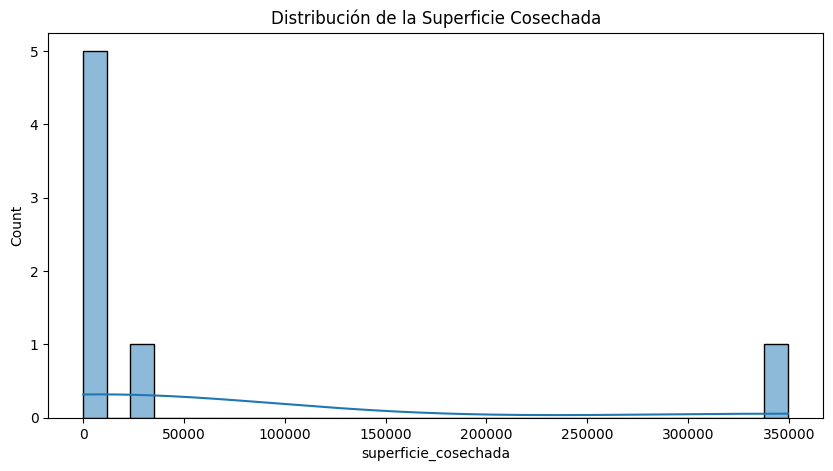

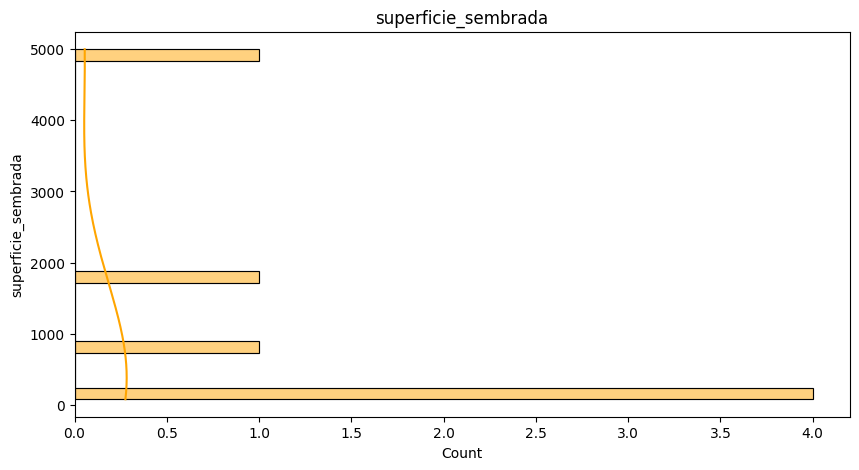

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'superficie_cosechada': [11229.157977, 25053.162067, 0.0, 228.0, 1600.0, 9500.0, 349600.0],
    'superficie_sembrada': [858.745306, 1795.638586, 79.908676, 79.908676, 79.908676, 79.908676, 5000.0]
    }

df = pd.DataFrame(data, index=['mean', 'std', 'min', '25%', '50%', '75%', 'max'])

# Histograma de la superficie cosechada
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='superficie_cosechada', bins=30, kde=True)
plt.title('Distribución de la Superficie Cosechada')
plt.show()

# Histograma de la superficie sembrada
plt.figure(figsize=(10, 5))
sns.histplot(data=df, y='superficie_sembrada', bins=30, kde=True, color='orange')
plt.title('superficie_sembrada')
plt.show()

Medidas Descriptivas

In [ ]:
# Medidas descriptivas para la columna 'superficie_cosechada'
mean_superficie_cosechada = df['superficie_cosechada'].mean()
median_superficie_cosechada = df['superficie_cosechada'].median()
mode_superficie_cosechada = df['superficie_cosechada'].mode()[0]  # Primer valor de la moda

# Medidas de dispersión
std_superficie_cosechada = df['superficie_cosechada'].std()#desviacion estandar

var_superficie_cosechada = df['superficie_cosechada'].var()#varianza

print(f"Media: {mean_superficie_cosechada}")
print(f"Mediana: {median_superficie_cosechada}")
print(f"Moda: {mode_superficie_cosechada}")
print(f"Desviación Estándar: {std_superficie_cosechada}")
print(f"Varianza: {var_superficie_cosechada}")

Media: 11229.157977122215
Mediana: 1600.0
Moda: 0
Desviación Estándar: 25053.162067300276
Varianza: 627660929.5704135


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'superficie_cosechada': [11229.157977, 25053.162067, 0.0, 228.0, 1600.0, 9500.0, 349600.0],
    'superficie_sembrada': [858.745306, 1795.638586, 79.908676, 79.908676, 79.908676, 79.908676, 5000.0],
    'Inversion_divisa_USD': [100, 200, 300, 400, 500, 600, 700]
}

df = pd.DataFrame(data, index=['mean', 'std', 'min', '25%', '50%', '75%', 'max'])

mean_Inversion_divisa_USD = df['Inversion_divisa_USD'].mean()

In [ ]:
# Medidas descriptivas para la columna 'superficie_sembrada' PRODUCTOR NOMBRE-
# INVERSION DIVISA- RENDIMIENTO USD

mean_Inversion_divisa_USD = df['Inversion_divisa_USD'].mean()
median_Inversion_divisa_USD = df['Inversion_divisa_USD'].median()
mode_Inversion_divisa_USD = df['Inversion_divisa_USD'].mode()[0]  # Primer valor de la moda

# Medidas de dispersión
std_Inversion_divisa_USD = df['Inversion_divisa_USD'].std()#desviacion estandar

var_Inversion_divisa_USD = df['Inversion_divisa_USD'].var()#varianza

print(f"Media: {mean_Inversion_divisa_USD}")
print(f"Mediana: {median_Inversion_divisa_USD}")
print(f"Moda: {mode_Inversion_divisa_USD}")
print(f"Desviación Estándar: {std_Inversion_divisa_USD}")
print(f"Varianza: {var_Inversion_divisa_USD}")

Media: 400.0
Mediana: 400.0
Moda: 100
Desviación Estándar: 216.02468994692867
Varianza: 46666.666666666664


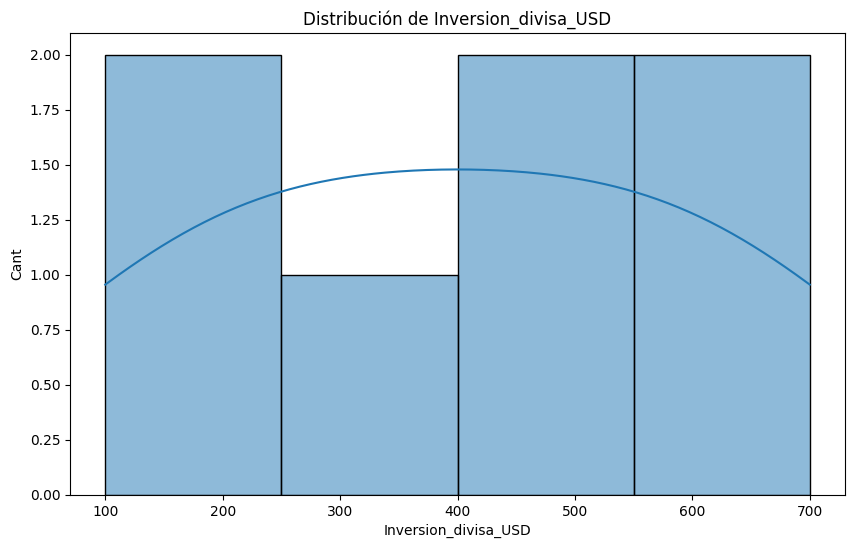

In [ ]:
# Histograma y gráfica de densidad
plt.figure(figsize=(10, 6))
sns.histplot(df['Inversion_divisa_USD'], kde=True)
plt.title('Distribución de Inversion_divisa_USD')
plt.xlabel('Inversion_divisa_USD')
plt.ylabel('Cant')
plt.show()

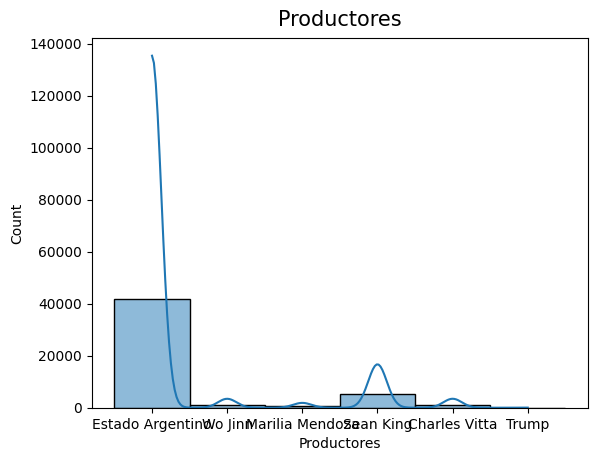

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS II/Estimaciones Agricolas TPDATASCI csv.csv')
if "Productor_nombre" in df.columns:
    sns.histplot(data=df, x="Productor_nombre", kde=True)
    plt.title("Productores", fontsize=15, verticalalignment='bottom')
    plt.xlabel("Productores", fontsize=10)
    plt.show()
else:
    print("Error")

<function matplotlib.pyplot.show(close=None, block=None)>

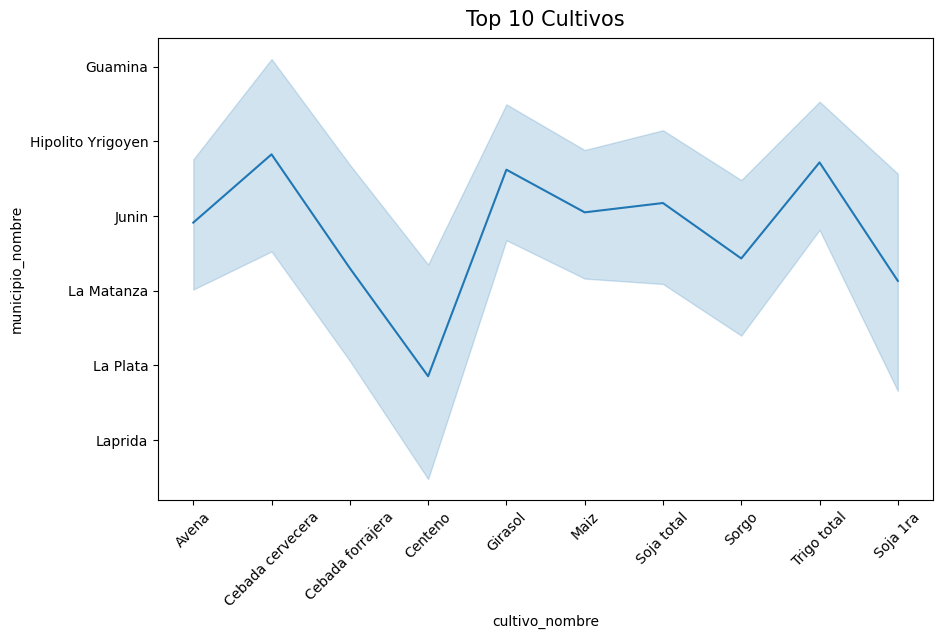

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS II/Estimaciones Agricolas TPDATASCI csv.csv')
top_10_cultivos = df['cultivo_nombre'].value_counts().head(10)
top_5_municipio = df['municipio_nombre'].value_counts().head(10)
df_top_10 = df[df['cultivo_nombre'].isin(top_10_cultivos.index)]
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'cultivo_nombre', y = 'municipio_nombre', data=df_top_10 )
plt.title("Top 10 Cultivos", fontsize=15, verticalalignment='bottom')
plt.xticks (rotation=45)
plt.show

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS II/Estimaciones Agricolas TPDATASCI csv.csv')

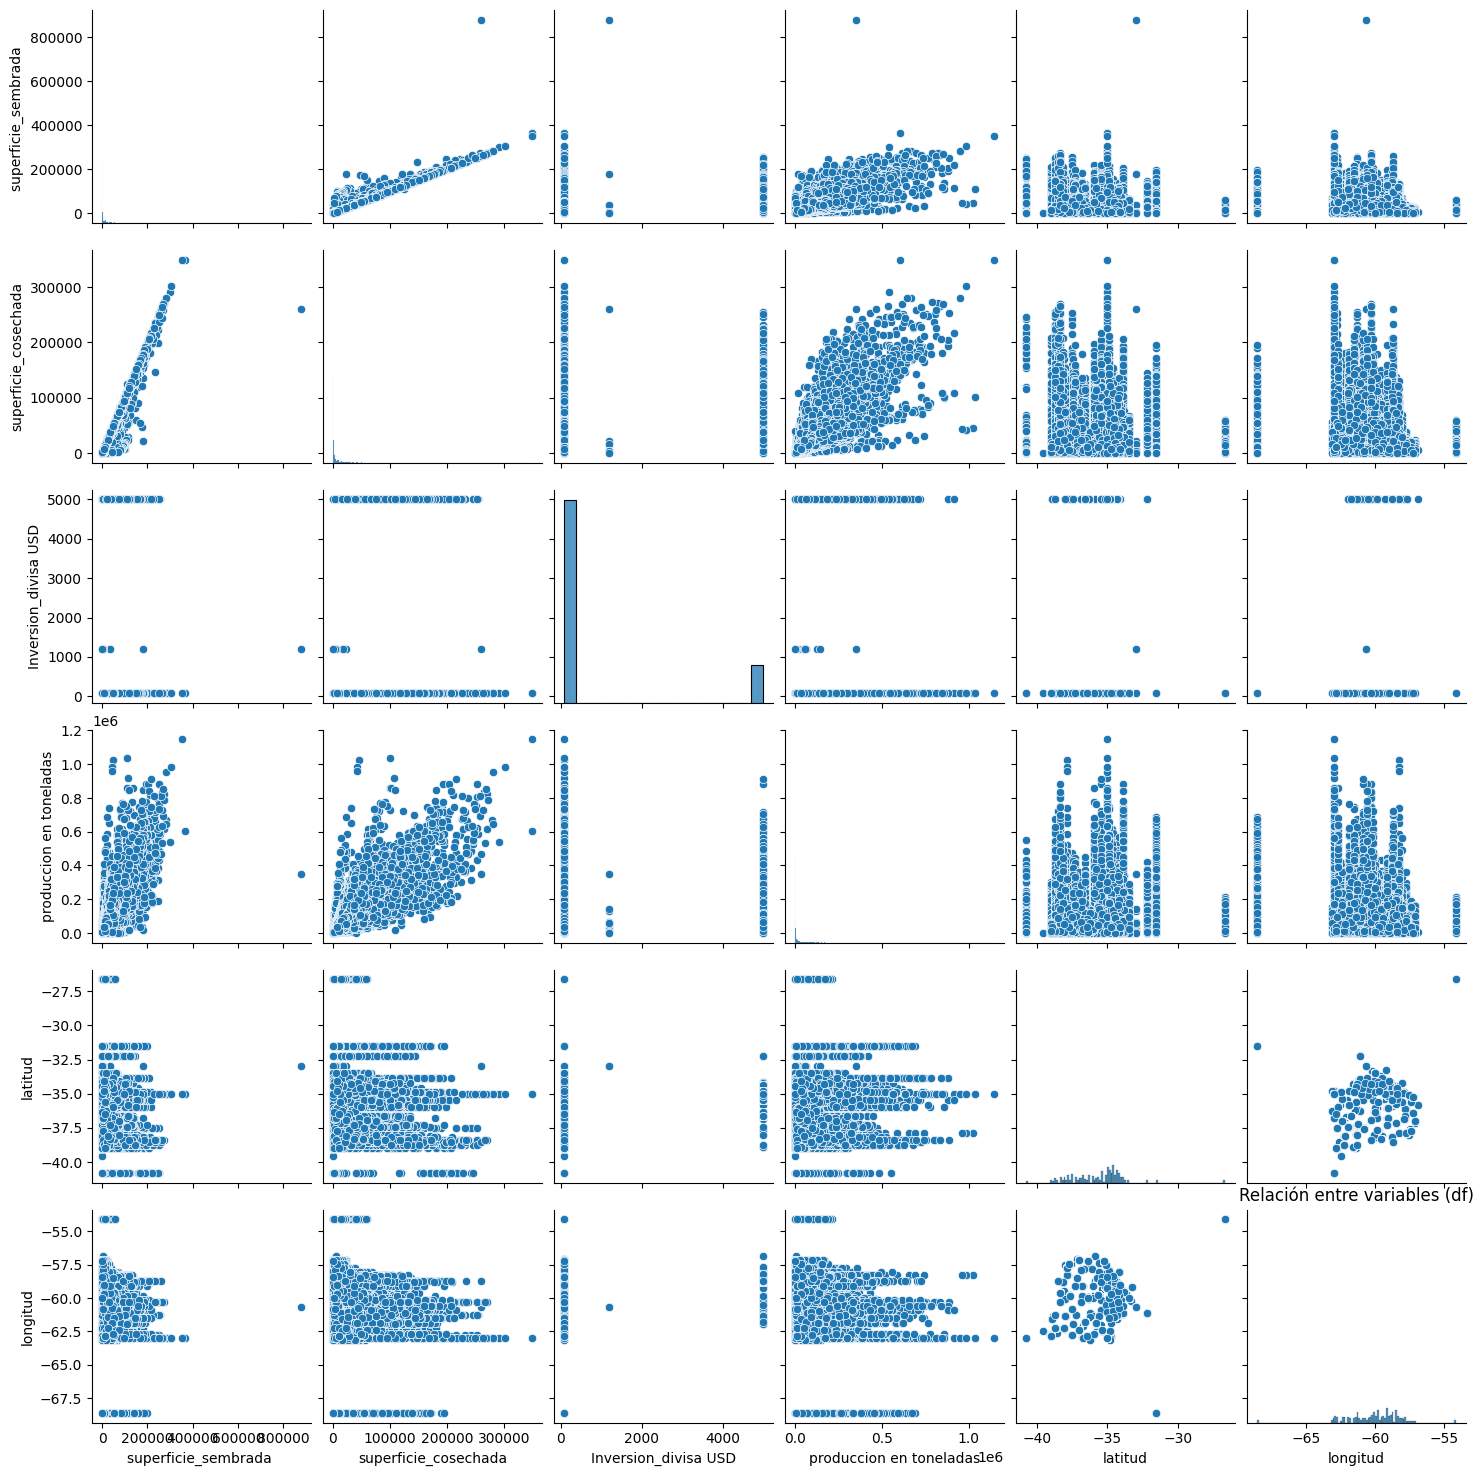

In [ ]:
sns.pairplot(df)
plt.title("Relación entre variables (df)")
plt.show()

In [ ]:
print(df.columns)

Index(['cultivo_nombre', 'municipio_nombre', 'superficie_sembrada ',
       'superficie_cosechada', 'Origen_Empresa', 'Productor_nombre',
       'Inversion_moneda', 'Inversion_divisa USD', 'produccion en toneladas',
       ' rendimiento USD', 'roi_porcent', 'latitud', 'longitud', 'year_fecha'],
      dtype='object')


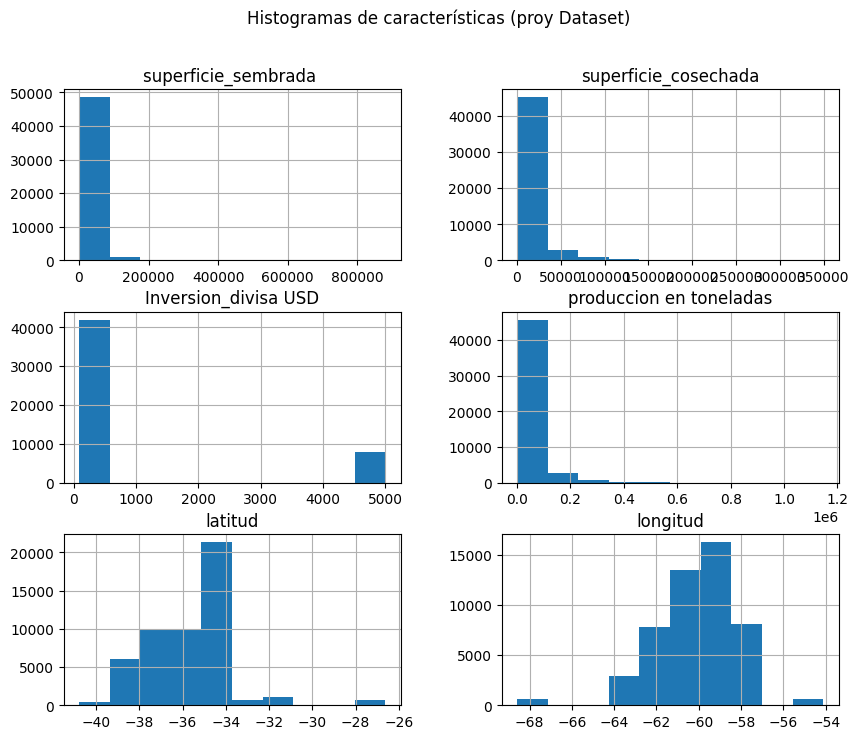

In [ ]:
# Histograma de características
df.hist(figsize=(10, 8))
plt.suptitle("Histogramas de características (proy Dataset)")
delete = plt.show('year_fecha')
plt.show()

In [ ]:
df.dropna()
df.head(10)

,cultivo_nombre,municipio_nombre,superficie_sembrada,superficie_cosechada,Origen_Empresa,Productor_nombre,Inversion_moneda,Inversion_divisa USD,produccion en toneladas,rendimiento USD,roi_porcent,latitud,longitud,year_fecha
0,Ajo,25 de Mayo,3,3,Local,Estado Argentino,ARS,79.91,10,3333.00,10%,-35.4432,-60.1721,January-20
1,Ajo,Adolfo Gonzales Chaves,15,15,Extranjera,Wo Jinn,USD,5000.00,82,5467.00,1%,-38.0481,-60.0744,January-20
2,Ajo,Alberti,5,5,Extranjera,Wo Jinn,USD,5000.00,7,1400.00,7%,-35.0279,-60.2851,January-20
3,Ajo,Almirante Brown,2,2,Local,Estado Argentino,ARS,79.91,8,4000.00,9%,-34.8116,-58.2619,January-20
4,Ajo,Arrecifes,6,6,Local,Estado Argentino,ARS,79.91,15,2500.00,10%,-34.0587,-60.1195,January-20
5,Ajo,Ayacucho,5,5,Local,Estado Argentino,ARS,79.91,14,2800.00,10%,-37.1516,-58.4832,January-20
6,Ajo,Bahia Blanca,10,10,Local,Estado Argentino,ARS,79.91,40,4000.00,9%,-38.7183,-62.2620,January-20
7,Ajo,Balcarce,450,450,Local,Estado Argentino,ARS,79.91,2025,4500.00,9%,-37.8397,-58.2576,January-20
8,Ajo,Baradero,5,5,Local,Estado Argentino,ARS,79.91,20,4000.00,9%,-33.8087,-59.5094,January-20
9,Ajo,Benito Juarez,5,5,Extranjera,Marilia Mendoza,USD,5000.00,22,4400.00,1%,-37.6690,-59.8039,January-20


#Metricas de Clasificacion

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/content/drive/MyDrive/DS II/Estimaciones Agricolas TPDATASCI csv.csv')
data['roi_porcent'] = data['roi_porcent'].str.rstrip('%').astype(float) /100


X = data[['roi_porcent']]
y = data['roi_porcent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadratico medio: {mse}")
print(f"R-cuadratico: {r2}")

Error cuadratico medio: 2.1843599075327436e-33
R-cuadratico: 1.0


Regresion Random Forest

In [5]:
!pip install scikit-learn
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [6]:
data = pd.read_csv('/content/drive/MyDrive/DS II/Estimaciones Agricolas TPDATASCI csv.csv')
data['roi_porcent'] = data['roi_porcent'].str.rstrip('%').astype(float) /100 # divide by 100 to make it a percentage (0-1)


X = data[['roi_porcent']]
y = data['roi_porcent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadratico medio: {mse}")
print(f"R-cuadratico: {r2}")

Error cuadratico medio: 2.1843599075327436e-33
R-cuadratico: 1.0


In [7]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print("=== Random Forest Regressor ===")
print(f"MAE: {rf_mae:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²: {rf_r2:.2f}")

=== Random Forest Regressor ===
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R²: 0.99


Podemos observar que el modelo està bien entrenado

#Analisis Univariado

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from scipy.stats import norm
from scipy import stats
import statistics

In [ ]:
data = {'Cultivo': ['Ajo', 'Soja', 'Cebada', 'Trigo'], 'Finanzas': [10, 1, 7, 9], 'Produccion': [3333, 5467, 1400, 4000]}
df = pd.DataFrame(data)

In [ ]:
df.dtypes

,0
Cultivo,object
Finanzas,int64
Produccion,int64


In [ ]:
data = {'Produccion': [3333, 5467, 1400, 4000]}
df = pd.DataFrame(data)

Cálculo de la media

In [ ]:
df.mean()

,0
Produccion,3550.0


De los 4 mayores cultivos que estamos analizando (Soja, Cebada, Trigo, Ajo) tenemos una producción promedio de 3550 toneladas.

Media Geometrica

In [ ]:
stats.gmean(df)

array([3178.28694228])

Mediana

In [ ]:
df.median()

,0
Produccion,3666.5


Moda

In [ ]:
data = [3333, 5467, 1400, 4000]
statistics.mode(data)

3333

In [ ]:
df.describe()

,Produccion
count,4.000000
mean,3550.000000
std,1687.895929
min,1400.000000
25%,2849.750000
50%,3666.500000
75%,4366.750000
max,5467.000000


from matplotlib import pyplot as plt
_df_0['Produccion'].plot(kind='hist', bins=20, title='Produccion')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Produccion'].plot(kind='line', figsize=(8, 4), title='Produccion')
plt.gca().spines[['top', 'right']].set_visible(False)

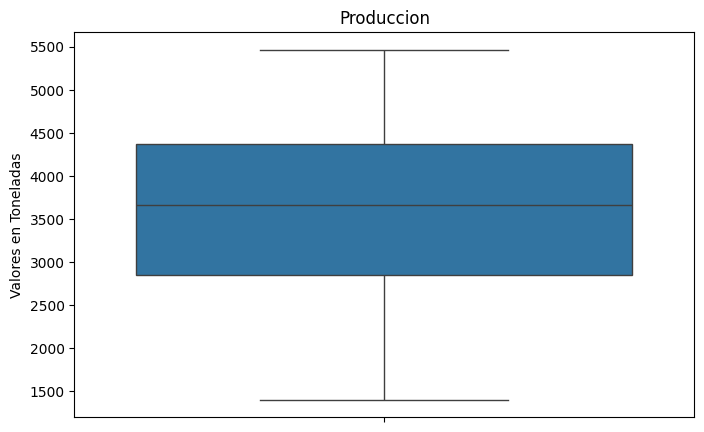

In [ ]:
data = [3333, 5467, 1400, 4000]
plt.figure(figsize=(8, 5))
sns.boxplot(data=data)
plt.title("Produccion")
plt.ylabel("Valores en Toneladas")
plt.show()

#Clustering Jerarquico

Vamos a aplicar Clustering Jerárquico para identificar patrones en la producción de ajo en los distintos municipios. Este método nos permitirà analizar la similitud entre productores (Agrìcolas o el Estado Argentino) en función de su inversión y rendimiento sin necesidad de especificar un número fijo de grupos.

In [ ]:

import pandas as pd
pd = pd.read_csv('/content/drive/MyDrive/DS II/Estimaciones Agricolas TPDATASCI csv.csv')


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

# Seleccionamos columnas numéricas para el clustering
df_num = pd.select_dtypes(include=['int64', 'float64'])

# Escalamos los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num.dropna())

# Dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Observaciones')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Agrupamos en 3 clusters como ejemplo
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = hc.fit_predict(df_scaled)

# Agregamos los clusters al DataFrame original
df_clustered = df_num.copy()
df_clustered["Cluster"] = clusters

# Visualización (ejemplo con las dos primeras columnas numéricas)
sns.scatterplot(data=df_clustered, x=df_clustered.columns[0], y=df_clustered.columns[1], hue="Cluster", palette="Set2")
plt.title('Clustering Jerárquico')
plt.show()



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
!pip install scipy
import scipy.cluster.hierarchy as sch


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS II/Estimaciones Agricolas TPDATASCI csv.csv')
df.head()

,cultivo_nombre,municipio_nombre,superficie_sembrada,superficie_cosechada,Origen_Empresa,Productor_nombre,Inversion_moneda,Inversion_divisa USD,produccion en toneladas,rendimiento USD,roi_porcent,latitud,longitud,year_fecha
0,Ajo,25 de Mayo,3,3,Local,Estado Argentino,ARS,79.91,10,3333.00,10%,-35.4432,-60.1721,January-20
1,Ajo,Adolfo Gonzales Chaves,15,15,Extranjera,Wo Jinn,USD,5000.00,82,5467.00,1%,-38.0481,-60.0744,January-20
2,Ajo,Alberti,5,5,Extranjera,Wo Jinn,USD,5000.00,7,1400.00,7%,-35.0279,-60.2851,January-20
3,Ajo,Almirante Brown,2,2,Local,Estado Argentino,ARS,79.91,8,4000.00,9%,-34.8116,-58.2619,January-20
4,Ajo,Arrecifes,6,6,Local,Estado Argentino,ARS,79.91,15,2500.00,10%,-34.0587,-60.1195,January-20


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
!pip install scipy
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans


df = pd.read_csv('/content/drive/MyDrive/DS II/Estimaciones Agricolas TPDATASCI csv.csv')


df['Inversion_divisa USD'] = pd.to_numeric(df['Inversion_divisa USD'], errors='coerce')
df['roi_porcent'] = pd.to_numeric(df['roi_porcent'], errors='coerce')


df.dropna(subset=['Inversion_divisa USD', 'roi_porcent'], inplace=True)


if df.empty:
    print("DataFrame is empty after dropping NaNs. Cannot proceed with clustering.")
else:
    X = df.iloc[:, 8:10].values  #Inversion divisa y Rendimiento
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    print(f'Inercia: {inertia}')

DataFrame is empty after dropping NaNs. Cannot proceed with clustering.


**Podemos observar que nos arroja error el preprocesamiento realizado.
Se puede detectar que algunas columnas contienen datos null, por lo que hay que corregir dicho error**

**Conclusión Final**

Tras aplicar y comparar dos técnicas de regresión lineal y Regresión Random Forest sobre los datos de estimaciones agrícolas, obtuvimos los siguientes hallazgos:

#🌾 Cultivo y Producción
La variable Producción mostró una relación clara con otras variables numéricas como Superficie sembrada y Rendimiento.
Algunos cultivos específicos pueden presentar mayor dispersión en los datos productivos, lo cual sugiere diferencias regionales, de clima o de prácticas agrícolas.


#💰 Finanzas y Predicción a futuro
El modelo de Regresión Lineal fue útil para observar relaciones lineales básicas, pero mostró mayor error y menor precisión.
El modelo de Random Forest logró mejores métricas de predicción (menor MAE y mayor R²), lo que lo hace más confiable para estimaciones financieras o proyecciones de producción en función de variables agrícolas.
